In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [3]:

from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

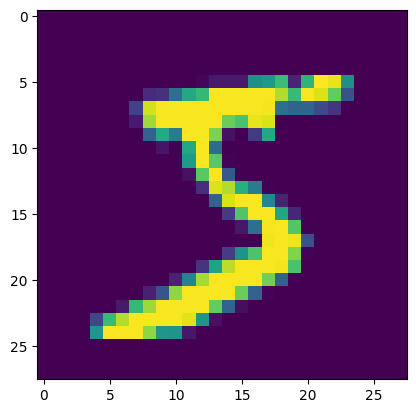

In [5]:
plt.imshow(X_train[0])

In [6]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] 

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') 
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') 

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [9]:
# define classification model
def classification_model():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
#it takes time
model = classification_model()


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)


scores = model.evaluate(X_test, y_test, verbose=0) 

Epoch 1/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9439 - loss: 0.1869 - val_accuracy: 0.9685 - val_loss: 0.1047
Epoch 2/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9755 - loss: 0.0789 - val_accuracy: 0.9717 - val_loss: 0.0909
Epoch 3/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.9799 - val_loss: 0.0668
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9873 - loss: 0.0401 - val_accuracy: 0.9804 - val_loss: 0.0639
Epoch 5/10
1875/1875 - 14s - 8ms/step - accuracy: 0.9904 - loss: 0.0302 - val_accuracy: 0.9796 - val_loss: 0.0732
Epoch 6/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9807 - val_loss: 0.0814
Epoch 7/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9930 - loss: 0.0217 - val_accuracy: 0.9800 - val_loss: 0.0872
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9787 - val_loss: 0.0950
Epoch 9/10
1875/1875 - 14s - 8ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.

In [11]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))      

Accuracy: 0.9736999869346619% 
 Error: 0.026300013065338135


In [12]:
model.save('classification_model.keras')

In [ ]:
#pretrained_model = keras.saving.load_model('classification_model.keras')

In [13]:
from PIL import Image
import numpy as np


In [25]:
def preprocess_custom_image(image_path):
    # Load and convert to grayscale
    img = Image.open(image_path).convert('L') 
    
    img = img.resize((28, 28))
   
    img_array = np.array(img)
   
    img_array = 255 - img_array
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Flatten to match model input shape
    img_array = img_array.reshape(1, -1)  # Shape: (1, 784)
    
    return img_array


In [28]:

image_path = "555.png"
custom_image = preprocess_custom_image(image_path)

prediction = model.predict(custom_image)
predicted_class = np.argmax(prediction)

print(f"The model predicts the digit is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The model predicts the digit is: 5


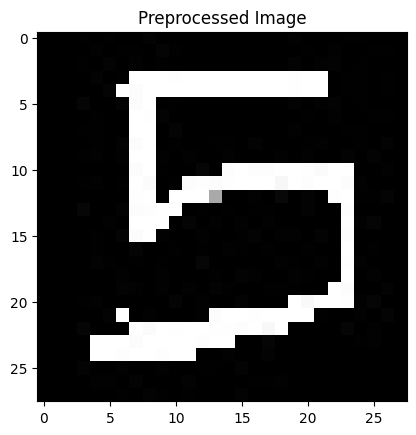

In [29]:
plt.imshow(custom_image.reshape(28, 28), cmap='gray')
plt.title("Preprocessed Image")
plt.show()
